In [11]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn
## note i installed pip install matplotlic and swarmpackagepy in terminal meaning in project


  Cloning https://github.com/7ossam81/SwarmPackagePy.git to c:\users\dell\appdata\local\temp\pip-req-build-a_6anjth


  Running command git clone --filter=blob:none --quiet https://github.com/7ossam81/SwarmPackagePy.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-a_6anjth'
  remote: Repository not found.
  fatal: repository 'https://github.com/7ossam81/SwarmPackagePy.git/' not found
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/7ossam81/SwarmPackagePy.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-a_6anjth' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/7ossam81/SwarmPackagePy.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-a_6anjth' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.



Rendering animation (2D)...


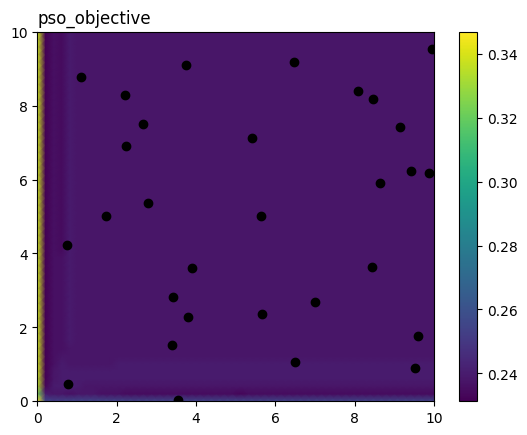

Rendering animation (3D)...


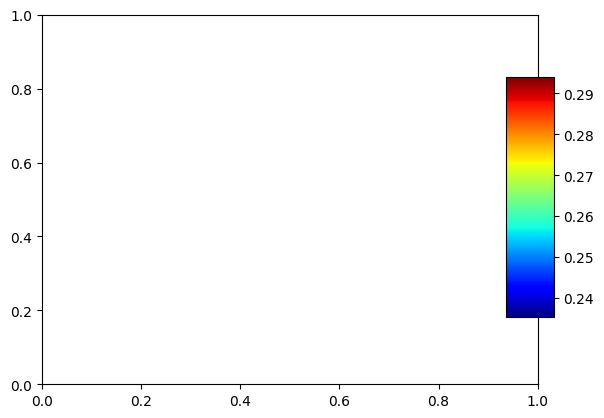


Best fitness (1 - accuracy): 0.2296416938110749
Best weights: [10.00009886  0.25832129]
Test Accuracy: 0.7727

Enter values for: Glucose, BMI
Prediction: Not Diabetic


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import SwarmPackagePy
from SwarmPackagePy import animation, animation3D

# --- Load and Preprocess Dataset ---
df = pd.read_csv("diabetes.csv")

# ✅ Use only 2 features for 2D PSO optimization
selected_features = ['Glucose', 'BMI']  # You can change these
X = df[selected_features]
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Objective Function for 2D PSO ---
def pso_objective(weights):
    weights = np.clip(weights, 0, 10)
    X_weighted = X_train * weights
    model = LogisticRegression(max_iter=200)
    model.fit(X_weighted, y_train)
    y_pred = model.predict(X_weighted)
    return 1 - accuracy_score(y_train, y_pred)

# --- Wrapper for SwarmPackagePy ---
class ObjectiveWrapper:
    def __init__(self, func):
        self.func = func
        self.__name__ = func.__name__  # Add this line

    def __call__(self, agent_position):
        return self.func(np.array(agent_position))

# --- Run 2D PSO Optimization ---
wrapped_obj = ObjectiveWrapper(pso_objective)

alh = SwarmPackagePy.pso(
    n=30,
    function=wrapped_obj,
    lb=0, ub=10,
    dimension=2,      # ✅ Only 2 dimensions now
    iteration=50,
    w=0.5, c1=1, c2=1
)

# ✅ Render PSO animation
try:
    print("\nRendering animation (2D)...")
    animation(alh.get_agents(), wrapped_obj, 0, 10)
    print("Rendering animation (3D)...")
    animation3D(alh.get_agents(), wrapped_obj, 0, 10)
except Exception as e:
    print("Animation error:", e)

# --- Best Solution ---
best_weights = np.array(alh.get_Gbest())
best_score = pso_objective(best_weights)

print("\nBest fitness (1 - accuracy):", best_score)
print("Best weights:", best_weights)

# --- Final Model and Test Accuracy ---
final_model = LogisticRegression(max_iter=200)
final_model.fit(X_train * best_weights, y_train)
y_pred_test = final_model.predict(X_test * best_weights)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_acc:.4f}")

# --- Predict on User Input ---
print(f"\nEnter values for: {selected_features[0]}, {selected_features[1]}")
user_input = [float(input(f"{feature}: ")) for feature in selected_features]
user_scaled = scaler.transform([user_input])
user_weighted = user_scaled * best_weights
prediction = final_model.predict(user_weighted)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")